# Assignment 1


# Problem 1

Let the joint PDF $f(X,Y)$ be represented by the following table of values:


|  | y=-1| y=0 | y=1 | y=2 |
| :--- | :----: | :---: | :---: | ---: |
| $x=2$ | 0.1 | 0 | 0.15 | 0 |
| $x=3$ | 0.1 | 0.1 | 0.05 | 0.05 |
| $x=4$ | 0 | 0.05 | 0.15 | 0.25 |

 **Part A)** Find $E[X]$ and $E[Y]$. Save your answers as `p1.a.ex` and `p1.a.ey`.

In [15]:
x_vals = c(2, 3, 4)
y_vals = c(-1, 0, 1, 2)

fxy = matrix(
  c(0.10, 0.00, 0.15, 0.00,
    0.10, 0.10, 0.05, 0.05,
    0.00, 0.05, 0.15, 0.25),
  nrow = length(x_vals),
  byrow = TRUE
)

px = rowSums(fxy)   # sums across y for each fixed x
py = colSums(fxy)   # sums across x for each fixed y
px
py

# 5) Compute expectations using marginals
p1.a.ex = sum(x_vals * px)       # E[X] = sum_x x * P_X(x)
p1.a.ey = sum(y_vals * py)        # E[Y] = sum_y y * P_Y(y)

c(p1.a.ex, p1.a.ey)


[1] 0.25 0.30 0.45

[1] 0.20 0.15 0.35 0.30

[1] 3.20 0.75

In [16]:
# Hidden Test Cell
# NOTE: This cell contains hidden tests. You will not see if you passed these tests until you submit your assignment.
# Any cell labeled "Hidden Test Cell" MAY have hidden tests.

**Part B)** Find $E[XY]$. Save your answer as `p1.b.exy`.

## Understanding the `outer()` Function in R

The `outer()` function is a powerful R function that applies a given function to all combinations of elements from two vectors, creating a matrix as output. It's particularly useful for creating multiplication tables, grids of calculations, or any scenario where you need to apply an operation between every element of one vector and every element of another.

**Syntax:** `outer(X, Y, FUN = "*", ...)`

**Parameters:**
- `X`: First vector (will correspond to rows in the output matrix)
- `Y`: Second vector (will correspond to columns in the output matrix)  
- `FUN`: Function to apply (default is multiplication `"*"`)

**How it works:**
- Creates a matrix with `length(X)` rows and `length(Y)` columns
- Each element `[i,j]` in the result equals `FUN(X[i], Y[j])`
- Essentially computes the **Cartesian product** of the two vectors with the specified operation

**Example:**
If `x = c(1, 2, 3)` and `y = c(4, 5)`, then `outer(x, y, "*")` produces:
```
     [,1] [,2]
[1,]    4    5    # 1*4, 1*5
[2,]    8   10    # 2*4, 2*5
[3,]   12   15    # 3*4, 3*5
```

**In our context:** We use `outer(x_vals, y_vals, "*")` to create a matrix where each element represents the product `x*y` for every possible combination of x and y values from our joint probability distribution. This is the first step in calculating $E[XY] = \sum_{x,y} xy \cdot f(x,y)$.

In [17]:
## Part B — Expectation of XY

# 1) Create all (x, y) combinations with their joint probabilities
# Use outer() to multiply x * y for each (x, y) pair
xy_products = outer(x_vals, y_vals, FUN = "*")
print("Matrix of XY products:")
xy_products


# 2) Multiply elementwise by the joint probabilities f(x,y)
xy_weighted = xy_products * fxy
print("Matrix of XY products weighted by f(x,y):")
xy_weighted

# 3) Sum over all entries to get E[XY]
p1.b.exy = sum(xy_weighted)
print(paste("E[XY]: ", p1.b.exy))


[1] "Matrix of XY products:"


-2,0,2,4
-3,0,3,6
-4,0,4,8


[1] "Matrix of XY products weighted by f(x,y):"


-0.2,0,0.30,0.0
-0.3,0,0.15,0.3
0.0,0,0.60,2.0


[1] "E[XY]:  2.85"


In [18]:
# Hidden Test Cell

**Part C)** Are $X$ and $Y$ independent? Answer the boolean value `TRUE` if they are independent and `FALSE` if they are not independent. Save your answer as `p1.c`.

In [19]:
p1.c <- FALSE


## Why X and Y are NOT Independent

To check independence, we need to verify if $f(x,y) = f_X(x) \cdot f_Y(y)$ for all $(x,y)$ pairs.

From our previous calculations:
- Marginal probabilities: $f_X(2) = 0.25$, $f_X(3) = 0.30$, $f_X(4) = 0.45$
- Marginal probabilities: $f_Y(-1) = 0.20$, $f_Y(0) = 0.15$, $f_Y(1) = 0.35$, $f_Y(2) = 0.30$

**Testing independence:**
- For $(x=2, y=-1)$: $f(2,-1) = 0.1$ but $f_X(2) \cdot f_Y(-1) = 0.25 \times 0.20 = 0.05$
- Since $0.1 \neq 0.05$, the variables are **NOT independent**

**Alternative evidence:** Notice that $f(2,0) = 0$ and $f(2,2) = 0$. If X and Y were independent, these probabilities would be $f_X(2) \cdot f_Y(0) = 0.25 \times 0.15 = 0.0375 \neq 0$ and $f_X(2) \cdot f_Y(2) = 0.25 \times 0.30 = 0.075 \neq 0$.

**Part D)** Define $U=X+Y$. What is $P(U \ge 4)$? Save your answer as `p1.d`.

## Step-by-Step Solution for Part D

We need to find $P(U \geq 4)$ where $U = X + Y$.

**Step 1:** Identify all possible $(x,y)$ combinations where $x + y \geq 4$

**Step 2:** Sum the joint probabilities $f(x,y)$ for those combinations

In [20]:
# Step-by-step calculation for P(U >= 4) where U = X + Y

# First, let's create a matrix showing all possible U = X + Y values
U_values = outer(x_vals, y_vals, FUN = "+")
print("Matrix of U = X + Y values:")
U_values

# Let's also display our joint probability matrix for reference
print("Joint probability matrix f(x,y):")
fxy

# Step 1: Find all combinations where U >= 4
condition_matrix = U_values >= 4
print("Positions where U >= 4:")
condition_matrix

# Step 2: Extract the joint probabilities for those positions
prob_u_geq_4 = fxy[condition_matrix]
print("Joint probabilities where U >= 4:")
prob_u_geq_4

# Step 3: Sum these probabilities
p1.d = sum(prob_u_geq_4)
print(paste("P(U >= 4) =", p1.d))

[1] "Matrix of U = X + Y values:"


1,2,3,4
2,3,4,5
3,4,5,6


[1] "Joint probability matrix f(x,y):"


0.1,0.00,0.15,0.00
0.1,0.10,0.05,0.05
0.0,0.05,0.15,0.25


[1] "Positions where U >= 4:"


FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,TRUE,TRUE
FALSE,TRUE,TRUE,TRUE


[1] "Joint probabilities where U >= 4:"


[1] 0.05 0.05 0.15 0.00 0.05 0.25

[1] "P(U >= 4) = 0.55"


In [21]:
# Alternative approach: Manual enumeration
# Let's list all (x,y) pairs and their U = x + y values, along with probabilities

print("Manual enumeration of all (x,y) pairs:")
for(i in 1:length(x_vals)) {
  for(j in 1:length(y_vals)) {
    x = x_vals[i]
    y = y_vals[j]
    u = x + y
    prob = fxy[i, j]
    status = if(u >= 4) "✓ INCLUDE" else "✗ exclude"
    cat(sprintf("(%d,%2d): U=%d, f(x,y)=%.2f %s\n", x, y, u, prob, status))
  }
}

# Sum only the probabilities where U >= 4
manual_sum = 0
for(i in 1:length(x_vals)) {
  for(j in 1:length(y_vals)) {
    u = x_vals[i] + y_vals[j]
    if(u >= 4) {
      manual_sum = manual_sum + fxy[i, j]
    }
  }
}

print(paste("Manual calculation: P(U >= 4) =", manual_sum))
print(paste("Matrix method result: P(U >= 4) =", p1.d))
print(paste("Results match:", manual_sum == p1.d))

[1] "Manual enumeration of all (x,y) pairs:"


(2,-1): U=1, f(x,y)=0.10 ✗ exclude
(2, 0): U=2, f(x,y)=0.00 ✗ exclude
(2, 1): U=3, f(x,y)=0.15 ✗ exclude
(2, 2): U=4, f(x,y)=0.00 ✓ INCLUDE
(3,-1): U=2, f(x,y)=0.10 ✗ exclude
(3, 0): U=3, f(x,y)=0.10 ✗ exclude
(3, 1): U=4, f(x,y)=0.05 ✓ INCLUDE
(3, 2): U=5, f(x,y)=0.05 ✓ INCLUDE
(4,-1): U=3, f(x,y)=0.00 ✗ exclude
(4, 0): U=4, f(x,y)=0.05 ✓ INCLUDE
(4, 1): U=5, f(x,y)=0.15 ✓ INCLUDE
(4, 2): U=6, f(x,y)=0.25 ✓ INCLUDE
[1] "Manual calculation: P(U >= 4) = 0.55"
[1] "Matrix method result: P(U >= 4) = 0.55"
[1] "Results match: TRUE"


# Problem 2

You work at the front desk of a library, and have to manage the printer. Sadly, the printer is old, and regularly jams. You know that your boss will only replace the printer if there is hard evidence, so you decide to record the number of times the printer was able to print successfully **before** it jammed. These values are recorded in `prints` below. Assume that these values are independent and identically distributed.

In [22]:
prints = c(12, 9, 3, 17, 5, 5, 3, 7, 0, 5, 17, 6, 9, 1, 13)

**Part A)** Let $X$ be a random variable for the number of times the printer was able to print before it jammed. Then $X$ follows a Geometric distribution with some unknown probability $p$, where $X_i \in {0, 1, 2, \dots}$. We want to estimate $p$, that is the probability that the printer fails. Using the method of moments, what is the estimate $\hat{p}$?

1. $\dfrac{1}{\bar{X}}$
2. $\dfrac{1}{\bar{X}+1}$
3. $\dfrac{\bar{X}}{\bar{X}+1}$
4. $\dfrac{\bar{X}}{1-\bar{X}}$
5. None of the above.

Save the NUMBER corresponding to the correct answer into the variable `p2.a`.

## Step-by-Step Solution for Part A: Method of Moments for Geometric Distribution

**Understanding the Problem:**
- X = number of successful prints **before** the printer jams
- X follows a Geometric distribution with parameter p (probability of failure)
- X ∈ {0, 1, 2, ...} (this is the "number of failures before first success" parameterization)

**Key Insight:** There are two common parameterizations of the geometric distribution:
1. **Number of failures before first success:** X ∈ {0, 1, 2, ...} with E[X] = (1-p)/p
2. **Number of trials until first success:** Y ∈ {1, 2, 3, ...} with E[Y] = 1/p

We're using parameterization #1 since X can be 0 (printer jams immediately).

In [23]:
# Method of Moments for Geometric Distribution (failures before first success)
# Step 1: Calculate the sample mean
sample_mean = mean(prints)
sample_mean

# Step 3: Calculate the method of moments estimator
p_hat <- 1 / (sample_mean + 1)
p_hat

[1] 7.466667

[1] 0.1181102

## Summary: Why Option 2 is Correct

**Key Steps:**

1. **Identify the Distribution:** X ~ Geometric(p) where X ∈ {0, 1, 2, ...} represents the number of successful prints before the first jam.

2. **Theoretical Expectation:** For this parameterization of the geometric distribution:
   $$E[X] = \frac{1-p}{p}$$

3. **Method of Moments:** Set the sample mean equal to the theoretical expectation:
   $$\bar{X} = \frac{1-p}{p}$$

4. **Solve for p:**
   - $\bar{X} \cdot p = 1 - p$
   - $\bar{X} \cdot p + p = 1$
   - $p(\bar{X} + 1) = 1$
   - $\hat{p} = \frac{1}{\bar{X} + 1}$

**Result:** The method of moments estimator is $\hat{p} = \frac{1}{\bar{X} + 1}$, which corresponds to **Option 2**.

**Verification:** With our data, $\bar{X} = 7.467$, so $\hat{p} = \frac{1}{7.467 + 1} = 0.118$

**Part B)** Given your solution to **Part A**, calculate the estimated probability for the recorded data. Save this value into `p2.b`. (Include at least 2 decimal places.)

In [ ]:
p2.b = 1 / (mean(prints) + 1)
print(paste("Method of moments estimator p̂ =", round(p2.b, 3)))


[1] "Method of moments estimator p̂ = 0.118"


**Part C)** Let's try to visualize how well our estimator actually fits the data. 

To create a histogram of the "prints" data, one only needs to type <code>hist(prints)</code>. In order to store the results in a way the autograder can interpret, we need to store this in a variable like this: <code>my_hist_var=hist(prints)</code>

Recall that the y-axis of a histogram can be scaled in many different ways.
In order to make it so that the total area of each bar is the proportion of observations observed in the corresponding bin, we need to add "prob=T" (probability equals true) to the histogram command. This is called a "density histogram".

Finally, to control the way the bins break on the x-axis, we need to give a sequence of break values. As an example unrelated to this exercise, we might type <code>my_hist_var = hist(mydata,prob=T,breaks=seq(1,8,1))</code> to put breaks at 1,2, ..., 8.

For this exercise,  create a density histogram of the `prints` values and store it in variable `p2.c.hist`. Center the bars on the integers 0 through 17 by making breaks at -0.5, 0.5, 1.5, ..., 17.5. Add the curve of a geometric distribution, with the probability of what you estimated in **Part B**, ontop of your histogram. Think about how well this curve approximates the distribution.

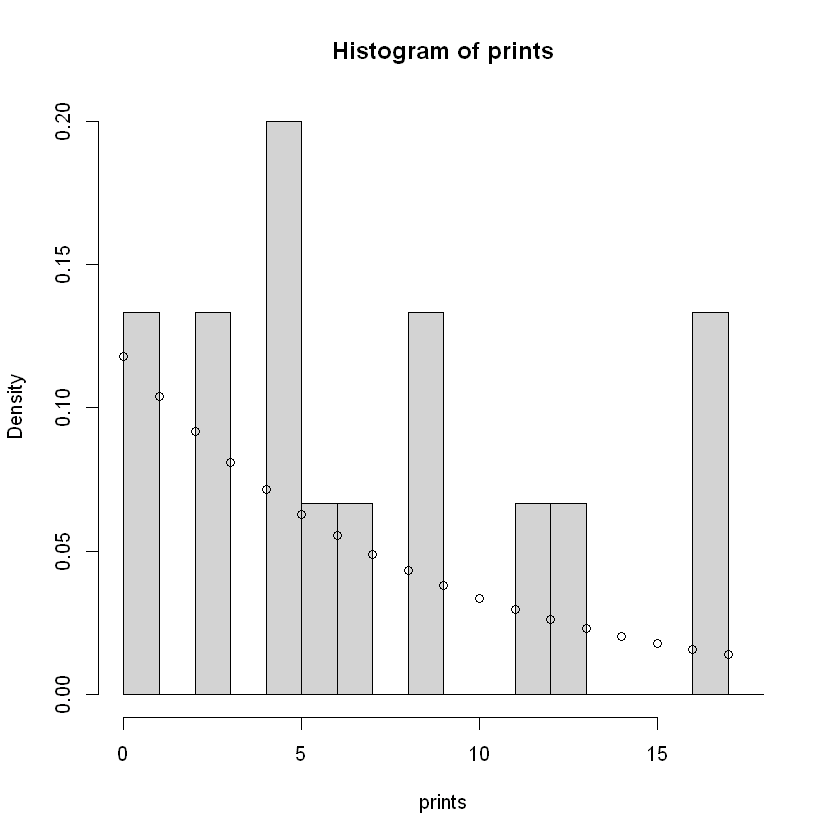

In [ ]:
p2.c.hist <- hist(prints, prob=TRUE, breaks=seq(0, max(prints)+1, 1))

# Optional overlay of fitted geometric PMF (failures-before-first-success)
k <- 0:max(prints)
points(k, dgeom(k, prob=p2.b))

**Part D)** what is the *true* underlying probability of this distribution? Save your answer as `p2.d` and round your answer to two decimal places. If it's not possible to answer this question, save your answer as the string `"not possible"`.

## Step-by-Step Solution for Part D

**The Question:** What is the *true* underlying probability parameter p of this geometric distribution?

**Step 1: Understanding the Distinction**
- **Population Parameter (p):** The true, unknown probability that characterizes the entire population
- **Sample Estimator ($\hat{p}$):** Our calculated estimate based on the sample data

**Step 2: What We Have**
- A sample of 15 observations: `prints = c(12, 9, 3, 17, 5, 5, 3, 7, 0, 5, 17, 6, 9, 1, 13)`
- This is only a **sample**, not the entire population of all possible printer jam events

**Step 3: What We Can Calculate**
- Sample statistics (mean, variance, etc.)
- Method of moments estimator: $\hat{p} = \frac{1}{\bar{X} + 1} \approx 0.118$
- Confidence intervals for p
- Other sample-based estimates

**Step 4: What We CANNOT Determine**
- The **true population parameter** p
- Why? Because we only have a finite sample, not infinite observations from the population

**Step 5: Fundamental Statistical Principle**
Sample statistics can only **estimate** population parameters. The true parameter remains unknown unless we have:
- The entire population data, OR
- Additional external information about the true parameter

**Conclusion:** Since we only have sample data and no additional information, it is **"not possible"** to determine the true underlying probability. Our estimate $\hat{p} \approx 0.118$ is our best guess, but the true p remains unknown.

In [ ]:
p2.d <- "not possible"